In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


In [3]:
df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv',encoding='latin1')

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [6]:
df.shape

(1303, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


NO NULL VALUES

In [8]:
null_values = df.isnull()

# Display the DataFrame with null value indicators
print(null_values)

      laptop_ID  Company  Product  TypeName  Inches  ScreenResolution    Cpu  \
0         False    False    False     False   False             False  False   
1         False    False    False     False   False             False  False   
2         False    False    False     False   False             False  False   
3         False    False    False     False   False             False  False   
4         False    False    False     False   False             False  False   
...         ...      ...      ...       ...     ...               ...    ...   
1298      False    False    False     False   False             False  False   
1299      False    False    False     False   False             False  False   
1300      False    False    False     False   False             False  False   
1301      False    False    False     False   False             False  False   
1302      False    False    False     False   False             False  False   

        Ram  Memory    Gpu  OpSys  Weig

In [9]:
df.duplicated().sum()

0

**removing gb and kg**

In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int32')

df['Weight'] = df['Weight'].str.replace('kg', '').astype('float32')

In [11]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [12]:

df['price'] = (df['Price_euros'] * 91.25).astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578


/tmp/ipykernel_33/3127329296.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

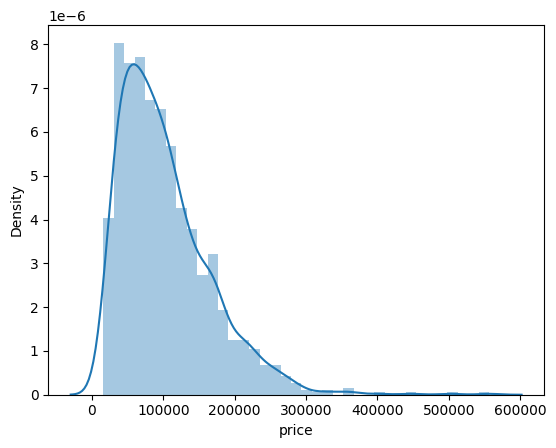

In [13]:
import seaborn as sns
sns.distplot(df['price'])

<Axes: xlabel='Company'>

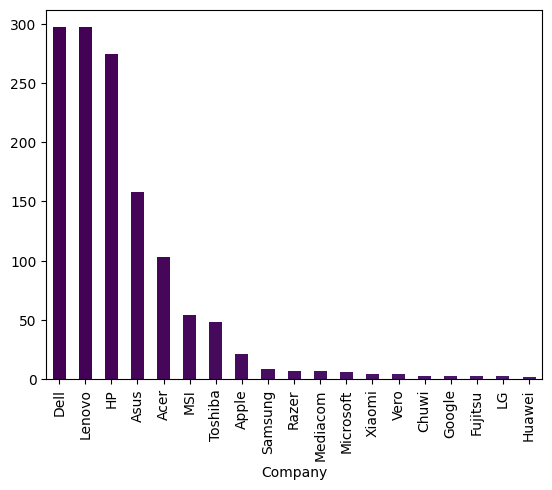

In [14]:
company_count = df['Company'].value_counts()
colors = plt.cm.viridis(range(len(company_count)))
df['Company'].value_counts().plot(kind='bar',color = colors)

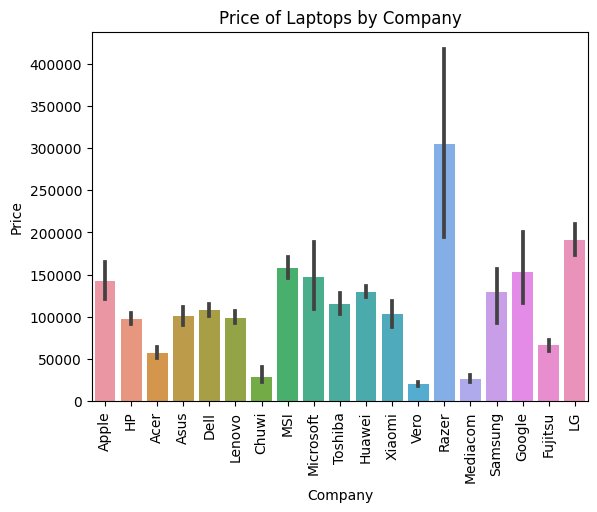

In [15]:


import seaborn as sns

# Assuming df['Company'] is categorical and df['price'] is numerical
sns.barplot(x='Company', y='price', data=df)
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Price of Laptops by Company')
plt.xticks(rotation=90)  
plt.show()


<Axes: xlabel='TypeName'>

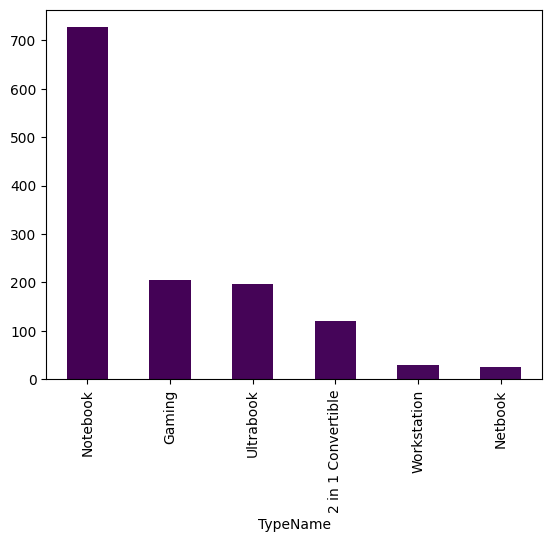

In [16]:
typeco = df['TypeName'].value_counts()
colors = plt.cm.viridis(range(len(typeco)))
typeco.plot(kind='bar',color = colors)

In [17]:
df['Product'].value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [18]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [19]:
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [20]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0


<Axes: xlabel='touchscreen'>

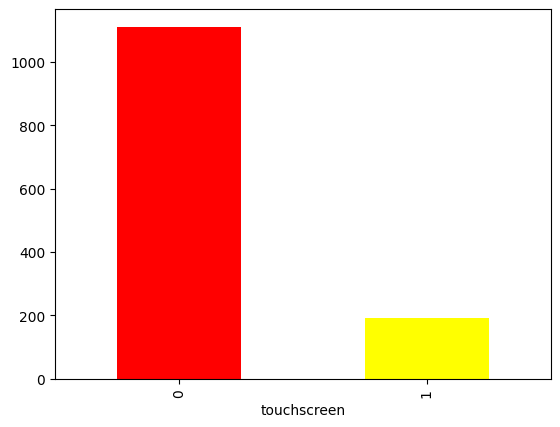

In [21]:
colors = ['red','yellow']
df['touchscreen'].value_counts().plot(kind = "bar",color = colors)

In [22]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<Axes: xlabel='IPS Panel'>

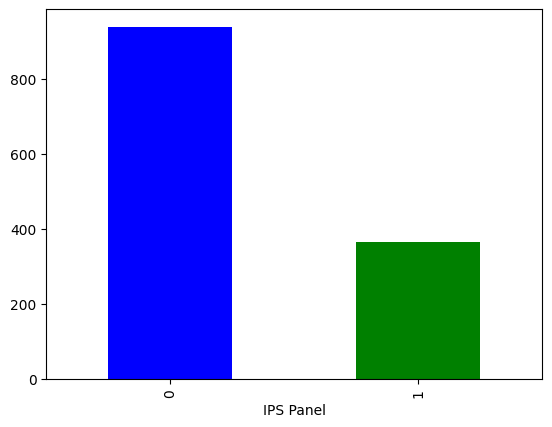

In [23]:
colors = ['blue','green']
df['IPS Panel'].value_counts().plot(kind = "bar",color = colors)

In [24]:
df['Full HD'] = df['ScreenResolution'].apply(lambda x:1 if 'Full HD' in x else 0)

<Axes: xlabel='Full HD'>

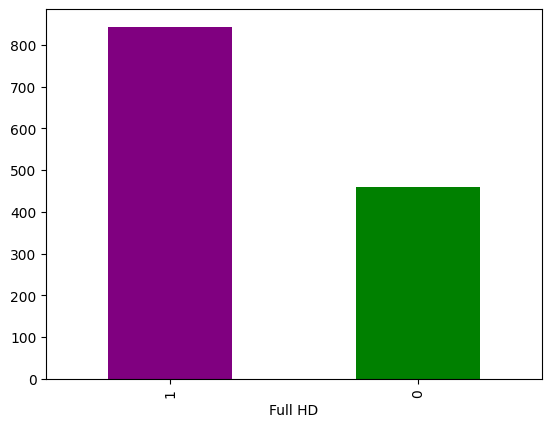

In [25]:
colors = ['purple','green']
df['Full HD'].value_counts().plot(kind = "bar",color = colors)

In [26]:
df['Quad HD+'] = df['ScreenResolution'].apply(lambda x:1 if 'Quad HD+' in x else 0)

<Axes: xlabel='Quad HD+'>

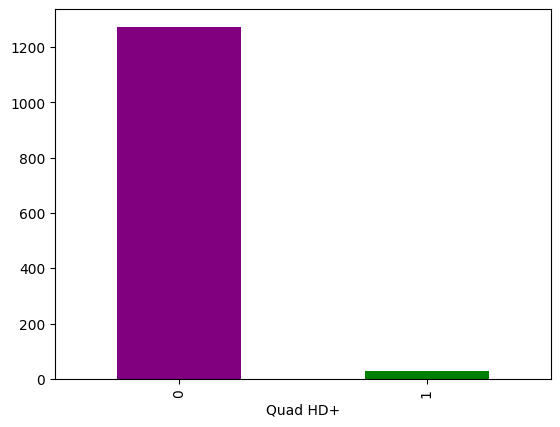

In [27]:
colors = ['purple','green']
df['Quad HD+'].value_counts().plot(kind = "bar",color = colors)

In [28]:
df[['width', 'height']] = df['ScreenResolution'].str.split('x', expand=True)

In [29]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0,1,0,0,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0,0,1,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0,1,0,0,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0,1,0,0,IPS Panel Retina Display 2560,1600


In [30]:
# Extracting  numeric values from the 'description' column
df['width'] = df['width'].astype(str)
df['width'] = df['width'].str.extract('(\d+)').astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0,1,0,0,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0,0,1,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0,1,0,0,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0,1,0,0,2560,1600


In [31]:
df['width'].astype(int)
df['height'].astype(int)
df.drop('Price_euros',axis = 1,inplace = True)

In [32]:
df['price'].round().astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122246,0,1,0,0,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,52468,0,0,1,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231542,0,1,0,0,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164578,0,1,0,0,2560,1600


In [33]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'price', 'touchscreen', 'IPS Panel', 'Full HD', 'Quad HD+', 'width',
       'height'],
      dtype='object')

In [34]:
# df.drop('ScreenResolution',axis = 1,inplace = True)

In [35]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [36]:
df.sample(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
598,605,Dell,Latitude 5289,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,152387,1,0,1,0,1920,1080
417,424,HP,EliteBook 1040,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,136875,0,0,1,0,1920,1080
345,351,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,103021,0,1,1,0,1920,1080
1242,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,500GB HDD,Intel HD Graphics 520,Linux,2.40,33014,0,0,0,0,1366,768
668,676,Toshiba,Tecra Z50-D-10E,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,114792,0,1,1,0,1920,1080
1263,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,26371,0,0,0,0,1366,768
1075,1090,Lenovo,IdeaPad 300-17ISK,Notebook,17.3,1600x900,Intel Core i5 6200U 2.3GHz,8,1.0TB HDD,AMD Radeon R5 M330,Windows 10,3.00,60133,0,0,0,0,1600,900
138,141,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920MX,No OS,2.20,45533,0,0,1,0,1920,1080
1225,1243,Asus,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,28196,0,0,0,0,1366,768
818,827,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,228583,0,1,1,0,1920,1080


In [37]:
df['i5'] = df['Cpu'].apply(lambda x:1 if 'i5' in x else 0)

<Axes: xlabel='i5', ylabel='count'>

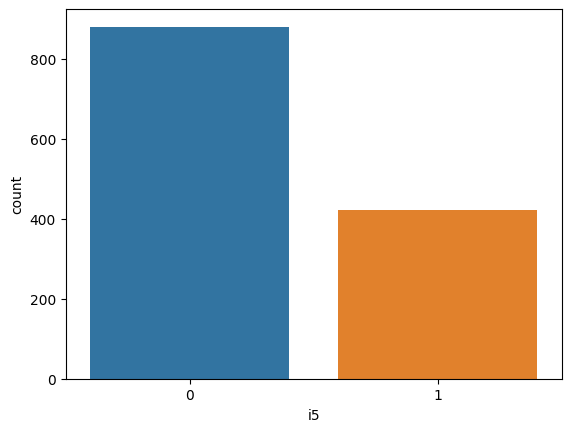

In [38]:
sns.countplot(x='i5', data=df)

In [39]:
df['i7'] = df['Cpu'].apply(lambda x:1 if 'i7' in x else 0)

<Axes: xlabel='i7', ylabel='count'>

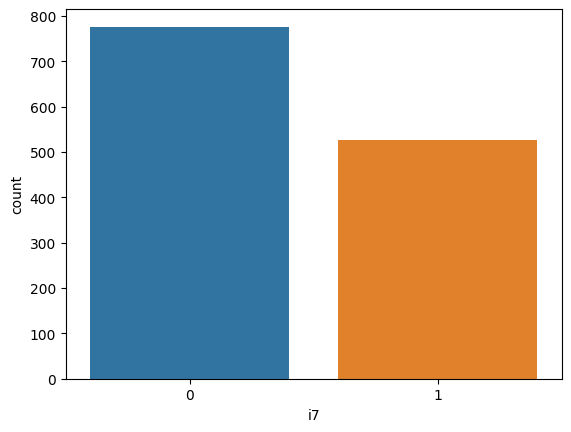

In [40]:
sns.countplot(x='i7', data=df)

In [41]:
df['i3'] = df['Cpu'].apply(lambda x:1 if 'i3' in x else 0)

<Axes: xlabel='i3', ylabel='count'>

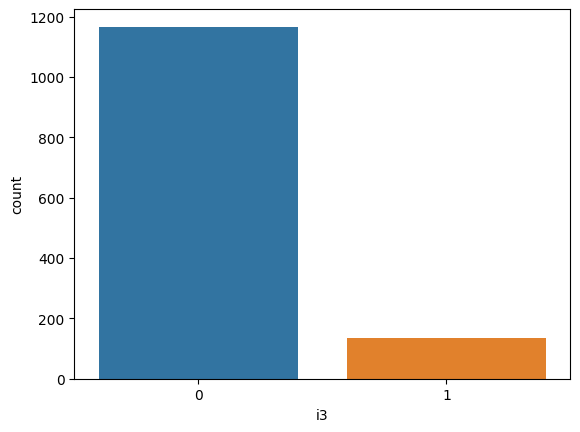

In [42]:
sns.countplot(x='i3', data=df)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  price             1303 non-null   int64  
 13  touchscreen       1303 non-null   int64  
 14  IPS Panel         1303 non-null   int64  
 15  Full HD           1303 non-null   int64  
 16  Quad HD+          1303 non-null   int64  


In [44]:
df.drop('laptop_ID',axis = 1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height,i5,i7,i3
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,122246,0,1,0,0,2560,1600,1,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,82028,0,0,0,0,1440,900,1,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,...,52468,0,0,1,0,1920,1080,1,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,...,231542,0,1,0,0,2880,1800,0,1,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,164578,0,1,0,0,2560,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,...,58217,1,1,1,0,1920,1080,0,1,0
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,...,136783,1,1,0,1,3200,1800,0,1,0
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,...,20896,0,0,0,0,1366,768,0,0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,...,69715,0,0,0,0,1366,768,0,1,0


In [45]:
df['height'] = df['height'].astype(int)
df['height'].info

<bound method Series.info of 0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: height, Length: 1303, dtype: int64>

In [46]:
# calculating pixels per inch
df['height'].astype(int)
df['ppi'] = (df['width']**2 + df['height']**2)**0.5/df['Inches']

In [47]:
df['other'] = df['Cpu'].apply(lambda x: 1 if not any(keyword in x for keyword in ['i3', 'i5', 'i7','AMD']) else 0)

# Creating the 'amd' column
df['amd'] = df['Cpu'].apply(lambda x: 1 if 'AMD' in x else 0)


In [48]:
df.sample(8)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Full HD,Quad HD+,width,height,i5,i7,i3,ppi,other,amd
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,0,0,2560,1600,1,0,0,226.983005,0,0
699,707,HP,15-bs011nv (i7-7500U/4GB/500GB/Radeon,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,500GB HDD,AMD Radeon 530,...,1,0,1920,1080,0,1,0,141.211998,0,0
27,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,...,1,0,1920,1080,1,0,0,141.211998,0,0
953,967,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8,64GB Flash Storage,Intel HD Graphics 515,...,1,0,1920,1080,0,0,0,176.232574,1,0
434,441,Lenovo,Thinkpad P51,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16,512GB SSD,Nvidia Quadro M2200M,...,1,0,1920,1080,0,1,0,141.211998,0,0
481,488,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,...,0,0,1366,768,0,0,1,100.454670,0,0
964,978,HP,ProBook 450,Notebook,15.6,1366x768,Intel Core i5 7200U 2.50GHz,8,1TB HDD,Nvidia GeForce 930MX,...,0,0,1366,768,1,0,0,100.454670,0,0
508,515,HP,Envy 13-AB002nv,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,...,1,0,1920,1080,0,1,0,165.632118,0,0


In [49]:
df2 = pd.DataFrame([df['i3'],df['i5'],df['i7'],df['amd'],df['other']])

In [50]:
# def get_cpu_brand(row):
#     if row['i3'] == 1:
#         return 'i3'
#     elif row['i5'] == 1:
#         return 'i5'
#     elif row['i7'] == 1:
#         return 'i7'
#     elif row['amd'] == 1:
#         return 'AMD'
#     else:
#         return 'Other'

# df2['CPU BRAND'] = df2.apply(get_cpu_brand, axis=1)
# df = df[['CPU BRAND']]

# # Creating a count plot
# sns.countplot(x='CPU BRAND', data=df2)
df['other'].value_counts()

other
0    1148
1     155
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


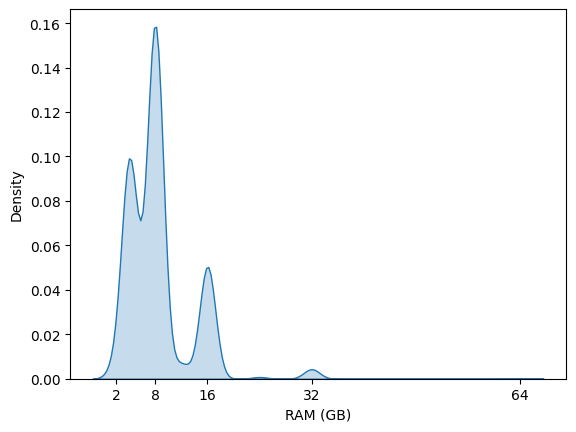

In [51]:
# kde plot
sns.kdeplot(df['Ram'], fill=True)
plt.xticks(ticks=[2,8, 16, 32, 64])
plt.xlabel('RAM (GB)')
plt.ylabel('Density')
plt.show()


In [56]:
columns_drop = ['laptop_ID','ScreenResolution','Cpu']
df = df.drop(columns_drop,axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   price        1303 non-null   int64  
 10  touchscreen  1303 non-null   int64  
 11  IPS Panel    1303 non-null   int64  
 12  Full HD      1303 non-null   int64  
 13  Quad HD+     1303 non-null   int64  
 14  width        1303 non-null   int64  
 15  height       1303 non-null   int64  
 16  i5           1303 non-null   int64  
 17  i7           1303 non-null   int64  
 18  i3           1303 non-null   int64  
 19  ppi   

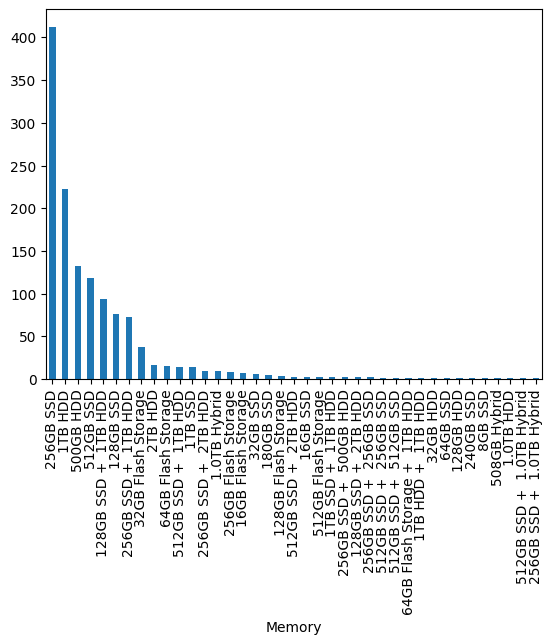

In [58]:
 plt  = df['Memory'].value_counts().plot(kind = 'bar')


<Axes: xlabel='Inches', ylabel='price'>

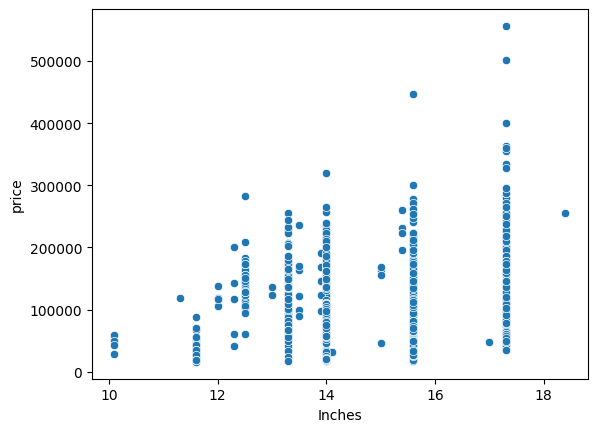

In [61]:
sns.scatterplot(x=df['Inches'],y=df['price'])

In [62]:
df.sample(8
         )


,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price,...,Full HD,Quad HD+,width,height,i5,i7,i3,ppi,other,amd
828,Acer,Chromebook 11,Netbook,11.6,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,32393,...,0,0,1366,768,0,0,0,135.094211,1,0
817,HP,Chromebook 11,Netbook,11.6,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23,35131,...,0,0,1366,768,0,0,0,135.094211,1,0
662,Lenovo,IdeaPad 320-15ISK,Notebook,15.6,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.20,48818,...,1,0,1920,1080,1,0,0,141.211998,0,0
449,Microsoft,Surface Laptop,Ultrabook,13.5,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,236246,...,0,0,2256,1504,0,1,0,200.842560,0,0
111,Dell,XPS 13,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,125833,...,0,1,3200,1800,0,1,0,276.053530,0,0
453,Lenovo,ThinkPad T470,Notebook,14.0,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.65,122731,...,1,0,1920,1080,1,0,0,157.350512,0,0
623,Fujitsu,LifeBook A557,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,72908,...,0,0,1366,768,1,0,0,100.454670,0,0
881,HP,Pavilion x360,2 in 1 Convertible,15.6,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.30,62487,...,0,0,1366,768,1,0,0,100.454670,0,0


In [ ]:
def memory():
    